In [131]:
import pickle
import gensim.downloader as api
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import colorcet
import seaborn as sns
from nltk import FreqDist
from sklearn.decomposition import KernelPCA


In [146]:
with open("../data/concs_labeled.pickle", "rb") as f:
    concs_labeled = pickle.load(f)

In [171]:
concs = [conc[0] for conc in concs_labeled]
labels = [conc[1] for conc in concs_labeled]
years =  [int(conc[2]) for conc in concs_labeled]

(2010.0, 2021.0)

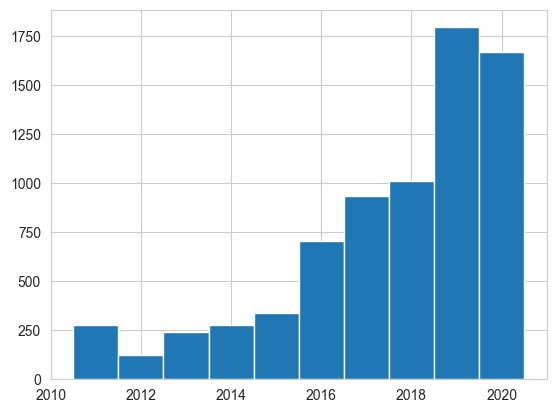

In [173]:
plt.hist(years, bins=[y+0.5 for y in range(2010, 2021)])
plt.xlim(2010,2021)

In [177]:
markers = ["o" if y<=2017 else "x" for y in years ]
len([el for el in markers if el=="x"])

4478

In [178]:
w2v = KeyedVectors.load("../data/large_data/w2v_news300.model")

In [220]:
vocab_counts = FreqDist([w for conc in concs for w in conc]).most_common()
vocab = [tup[0] for tup in vocab_counts]

In [219]:
w2v.index_to_key
w2v_filtered = Word2Vec()

['</s>',
 'in',
 'for',
 'that',
 'is',
 'on',
 '##',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are',
 'I',
 'have',
 'he',
 'will',
 'has',
 '####',
 'his',
 'an',
 'this',
 'or',
 'their',
 'who',
 'they',
 'but',
 '$',
 'had',
 'year',
 'were',
 'we',
 'more',
 '###',
 'up',
 'been',
 'you',
 'its',
 'one',
 'about',
 'would',
 'which',
 'out',
 'can',
 'It',
 'all',
 'also',
 'two',
 'after',
 'first',
 'He',
 'do',
 'time',
 'than',
 'when',
 'We',
 'over',
 'last',
 'new',
 'other',
 'her',
 'people',
 'into',
 'In',
 'our',
 'there',
 'A',
 'she',
 'could',
 'just',
 'years',
 'some',
 'U.S.',
 'three',
 'million',
 'them',
 'what',
 'But',
 'so',
 'no',
 'like',
 'if',
 'only',
 'percent',
 'get',
 'did',
 'him',
 'game',
 'back',
 'because',
 'now',
 '#.#',
 'before',
 'company',
 'any',
 'team',
 'against',
 'off',
 'This',
 'most',
 'made',
 'through',
 'make',
 'second',
 'state',
 'well',
 'day',
 'season',
 'says',
 'w

In [228]:
w2v.index_to_key

['</s>',
 'in',
 'for',
 'that',
 'is',
 'on',
 '##',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are',
 'I',
 'have',
 'he',
 'will',
 'has',
 '####',
 'his',
 'an',
 'this',
 'or',
 'their',
 'who',
 'they',
 'but',
 '$',
 'had',
 'year',
 'were',
 'we',
 'more',
 '###',
 'up',
 'been',
 'you',
 'its',
 'one',
 'about',
 'would',
 'which',
 'out',
 'can',
 'It',
 'all',
 'also',
 'two',
 'after',
 'first',
 'He',
 'do',
 'time',
 'than',
 'when',
 'We',
 'over',
 'last',
 'new',
 'other',
 'her',
 'people',
 'into',
 'In',
 'our',
 'there',
 'A',
 'she',
 'could',
 'just',
 'years',
 'some',
 'U.S.',
 'three',
 'million',
 'them',
 'what',
 'But',
 'so',
 'no',
 'like',
 'if',
 'only',
 'percent',
 'get',
 'did',
 'him',
 'game',
 'back',
 'because',
 'now',
 '#.#',
 'before',
 'company',
 'any',
 'team',
 'against',
 'off',
 'This',
 'most',
 'made',
 'through',
 'make',
 'second',
 'state',
 'well',
 'day',
 'season',
 'says',
 'w

In [231]:
w2v_filtered = KeyedVectors(vector_size=300)
# Iterate over the original KeyedVectors object
for word in vocab:
    try:
        w2v_filtered[word] = w2v[word]
    except:
        pass

In [232]:
def return_vectors(word_list, keyed_vectors):
    vocab_set = set(w2v.index_to_key)

    """
    replace words by vectors, while omitting missing words
    """
    word_list_filtered = list(set(word_list) & vocab_set)
    return [keyed_vectors[word] for word in word_list_filtered]

In [233]:
%%time
concs_vectors =  [return_vectors(conc, w2v) for conc in concs]

KeyboardInterrupt: 

In [180]:
len(concs_vectors)

7380

(array([  16.,   26.,   56.,   86.,  160.,  312.,  559.,  870., 1221.,
        1385., 1384.,  974.,  321.]),
 array([ 7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5,
        18.5, 19.5, 20.5]),
 <BarContainer object of 13 artists>)

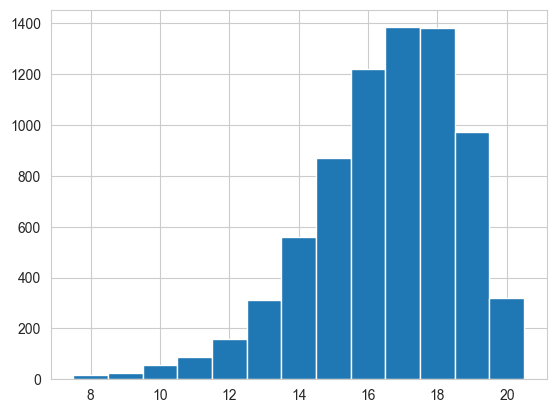

In [182]:
concs_vectors_lens = [len(conc) for conc in concs_vectors]
plt.hist(concs_vectors_lens, bins=[n+0.5 for n in range(7,21)])

In [126]:
w2v.wmdistance(concs[1000], concs[6000])

1.1662502845502938

In [127]:
w2v.wmdistance(concs[6000], concs[1000])

1.166250284550293

In [0]:
%%time
# create a NumPy array of concatenated sentences
concs_array = np.array(concs)

# create an empty NumPy array of the correct size
distance_matrix = np.zeros((len(concs_array), len(concs_array)))

In [67]:
# use a nested for loop to calculate the WMD distance between each pair of sentences
for i in range(len(concs_array)):
    if i in range(len(concs_array)):
        print(i)
    for j in range(len(concs_array)):
        distance_matrix[i, j] = w2v.wmdistance(concs_array[i], concs_array[j])

2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300


In [65]:
distance_matrix

array([[0.        , 1.1935133 , 1.12470575, ..., 1.12646636, 1.17672732,
        1.19946581],
       [1.1935133 , 0.        , 0.99223623, ..., 1.16944785, 1.13054945,
        1.18757709],
       [1.12470575, 0.99223623, 0.        , ..., 1.17084859, 1.16126862,
        1.11158765],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [68]:
with open("../data/large_data/distance_matrix.pickle", "wb") as f:
    pickle.dump(distance_matrix, f)

In [4]:
with open("../data/large_data/distance_matrix.pickle", "rb") as f:
    distance_matrix = pickle.load(f)

In [69]:
unique_labels = list(set(labels))
unique_labels

['inclusive',
 'neoliberal',
 'radical',
 'authoritatian',
 'exclusive',
 'nativist',
 'moderate',
 'right-wing',
 'nationalist',
 'left-wing']

In [190]:
palette = sns.color_palette("tab10", len(unique_labels))
labels_ordered = [tup[0] for tup in FreqDist(labels).most_common()]
color_dict = dict(zip(labels_ordered, palette))
labels_colors = [color_dict[l] for l in labels]

In [191]:
distance_matrix.shape

(7380, 7380)

In [204]:
tsne = TSNE(n_components=2, perplexity=50, init="random", learning_rate="auto")
distances_2d = tsne.fit_transform(distance_matrix)

(-71.49484901428222, 72.15721015930175, -83.02041244506836, 84.82954025268555)

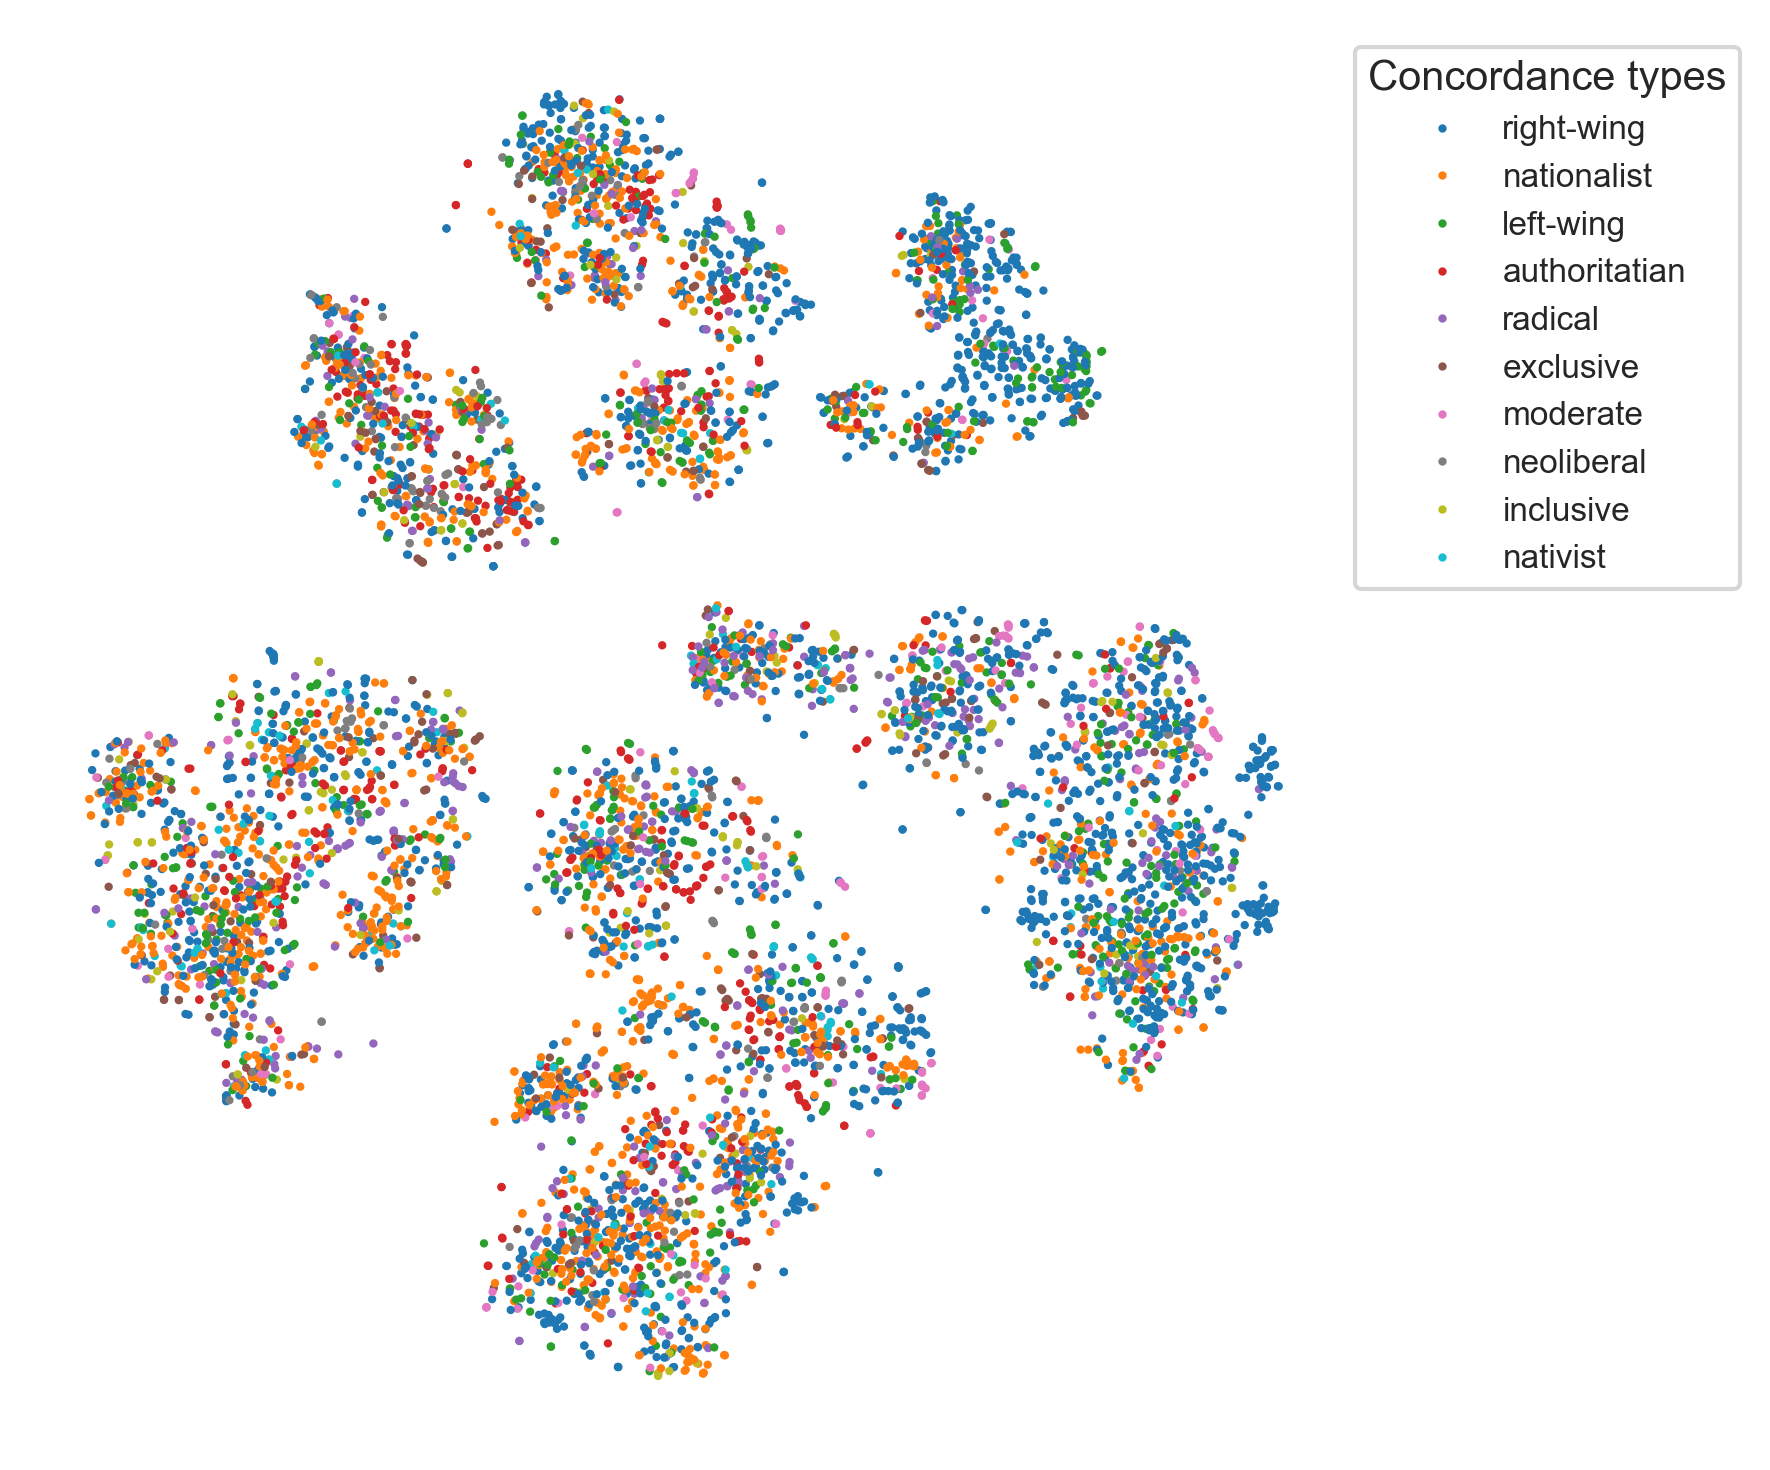

In [205]:
fig, ax = plt.subplots(figsize=(6,5), dpi=300, tight_layout=True)

ax.scatter(distances_2d[:, 0], distances_2d[:, 1], marker="o", s=1, c=labels_colors)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', markersize=1, linestyle='') for color in palette]
ax.legend(markers, labels_ordered, numpoints=1, title="Concordance types", fontsize=8, bbox_to_anchor=(1,1), loc="upper left")
ax.axis("off")

(-71.3179370880127, 72.14878578186035, -80.7548900604248, 83.00505027770996)

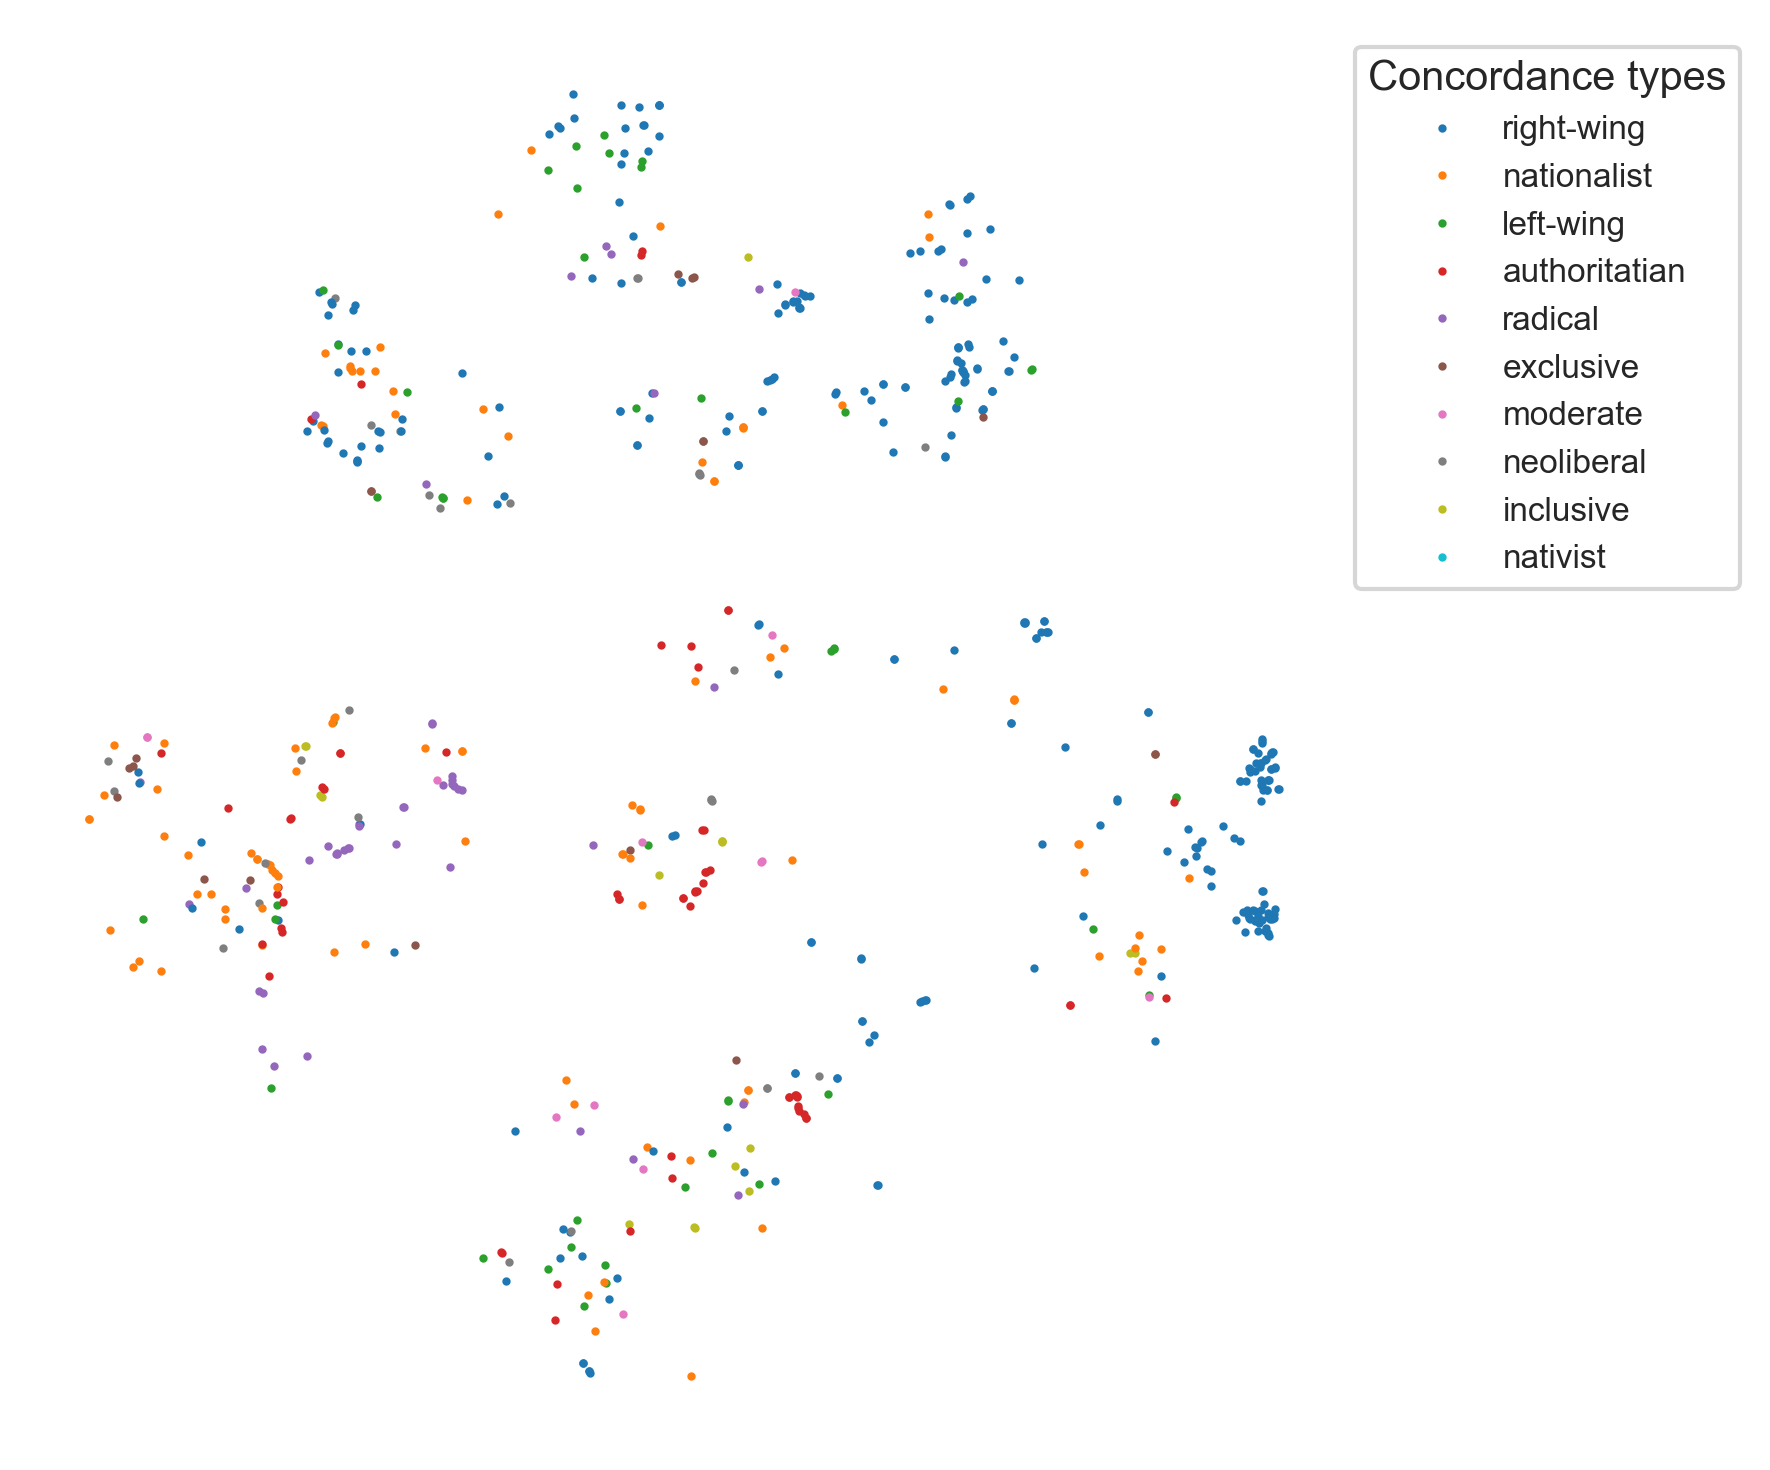

In [212]:
fig, ax = plt.subplots(figsize=(6,5), dpi=300, tight_layout=True)

for year, x, y, color in zip(years, distances_2d[:, 0], distances_2d[:, 1], labels_colors):
    if year <= 2013:
        ax.scatter(x, y, marker="o", s=1, color=color)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', markersize=1, linestyle='') for color in palette]
ax.legend(markers, labels_ordered, numpoints=1, title="Concordance types", fontsize=8, bbox_to_anchor=(1,1), loc="upper left")
ax.axis("off")

(-69.16297473907471, 69.57681217193604, -82.4125, 84.80059204101562)

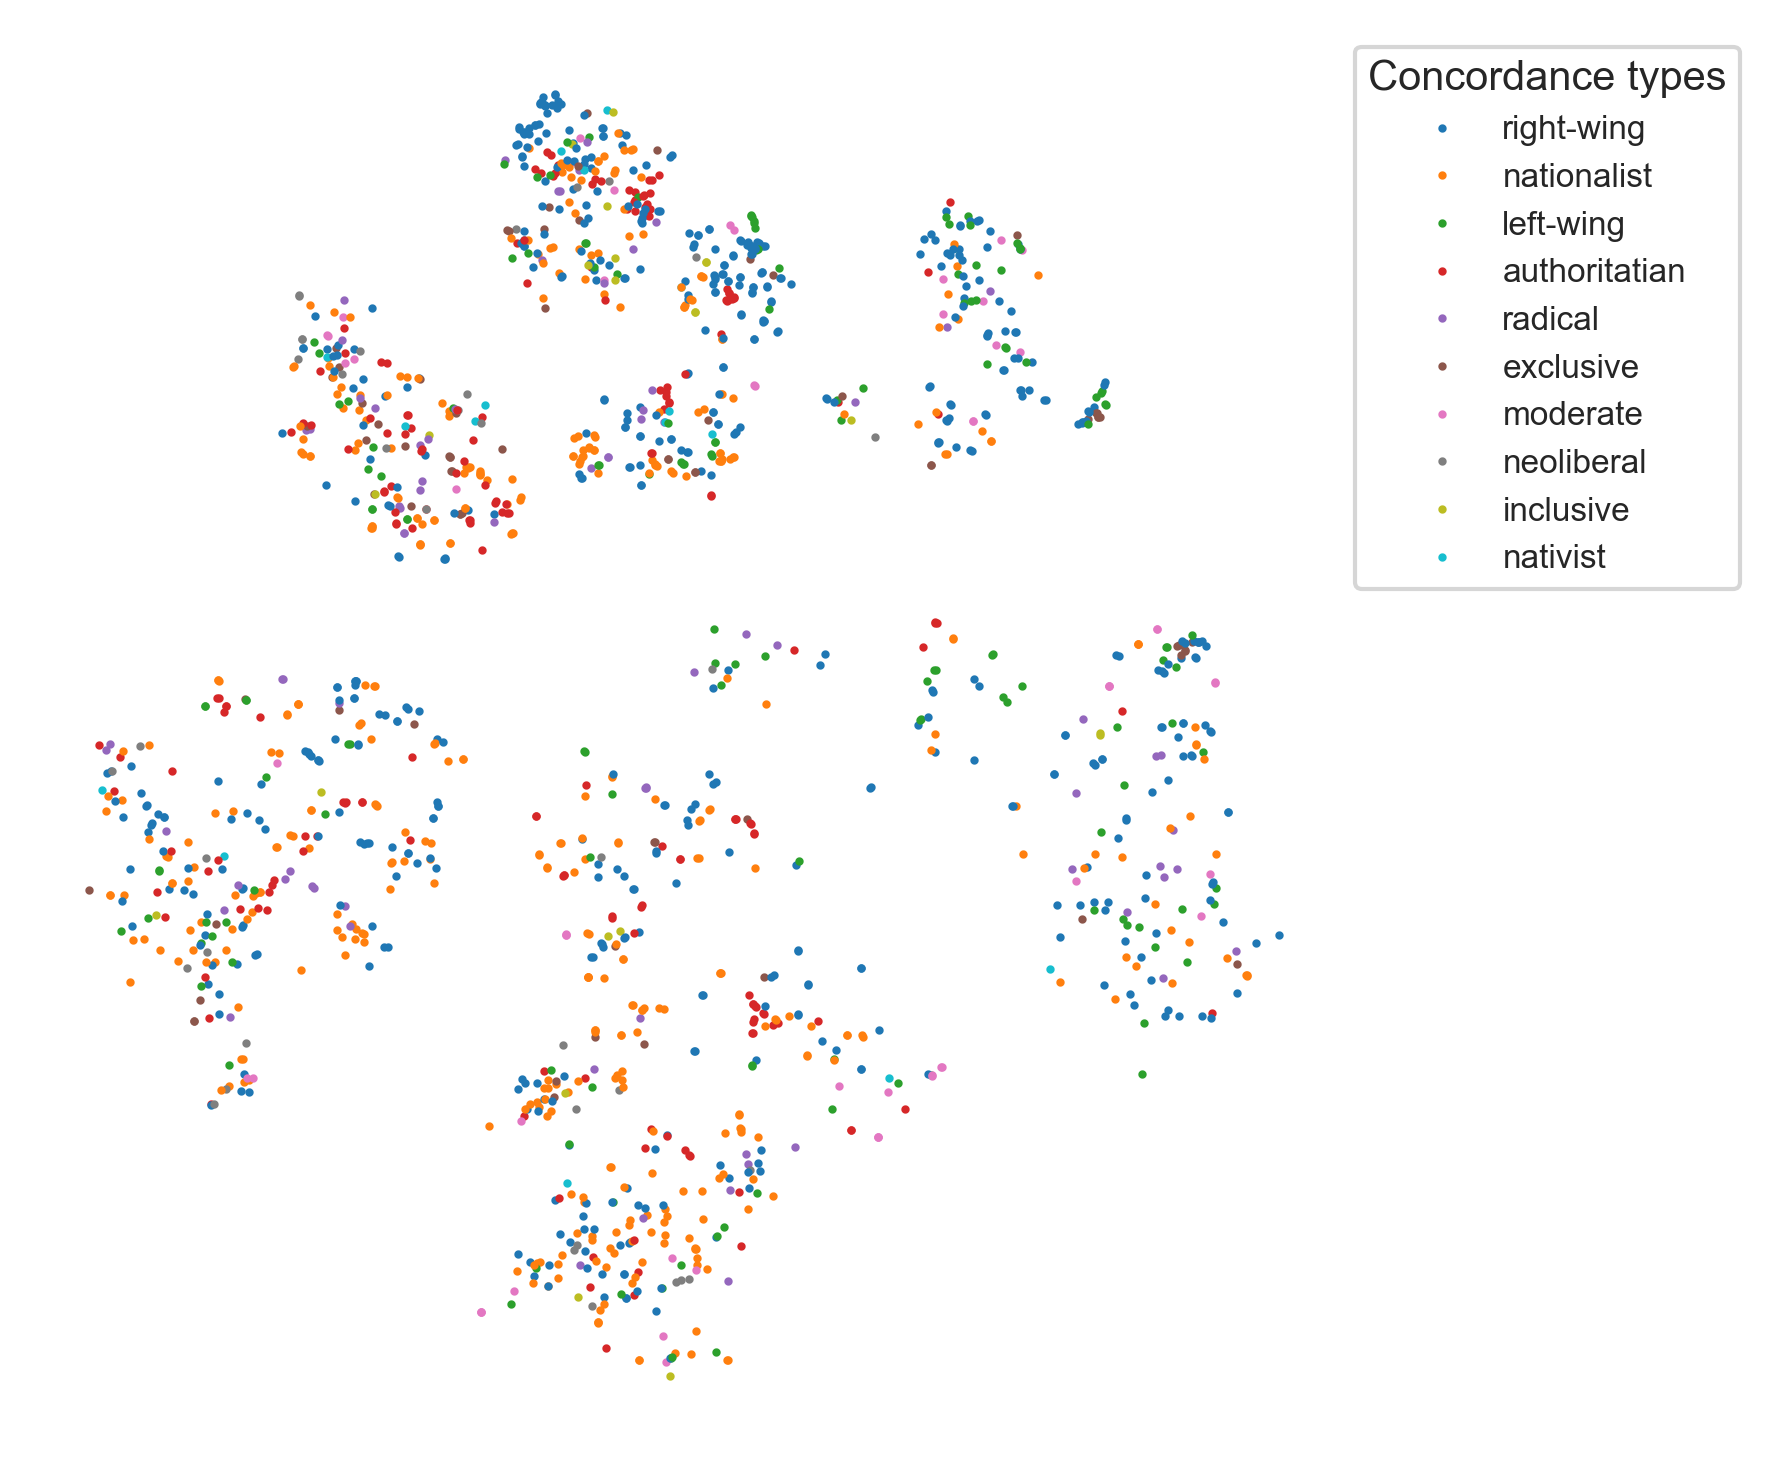

In [215]:
fig, ax = plt.subplots(figsize=(6,5), dpi=300, tight_layout=True)

for year, x, y, color in zip(years, distances_2d[:, 0], distances_2d[:, 1], labels_colors):
    if year == 2020:
        ax.scatter(x, y, marker="o", s=1, color=color)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', markersize=1, linestyle='') for color in palette]
ax.legend(markers, labels_ordered, numpoints=1, title="Concordance types", fontsize=8, bbox_to_anchor=(1,1), loc="upper left")
ax.axis("off")